# Handwritten Digit Classification

### Load Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

/Users/dixonhu/opt/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


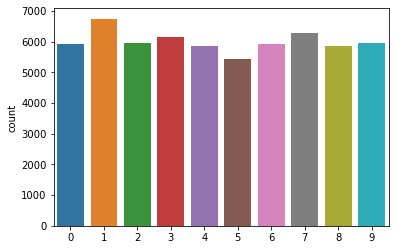

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
g = sns.countplot(y_train)

### Preprocess

In [26]:
print('Before: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('After: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Before:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
After:  (60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Training

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total para

In [37]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0185 - acc: 0.9953 - val_loss: 0.0483 - val_acc: 0.9869
Epoch 2/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0147 - acc: 0.9965 - val_loss: 0.0326 - val_acc: 0.9918
Epoch 3/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.0123 - acc: 0.9967 - val_loss: 0.0438 - val_acc: 0.9909
Epoch 4/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0102 - acc: 0.9972 - val_loss: 0.0419 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0078 - acc: 0.9980 - val_loss: 0.0622 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0514 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.0069 - acc: 0.9980 - val_loss: 0.

### Evaluation

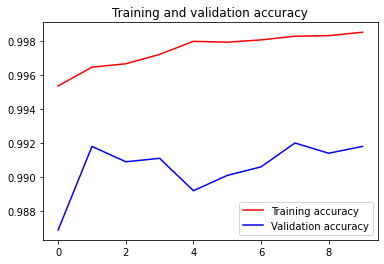

<Figure size 432x288 with 0 Axes>

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

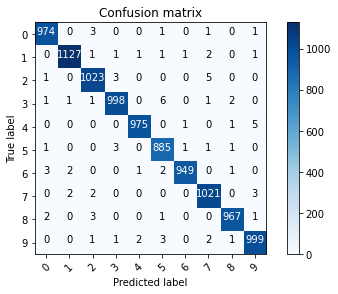

In [39]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
'''
Inspiration
1. https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
2. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
'''